# Tarea 1 - Clasificación

- Di Carlo, Martina
- Pastrana Analía
- Suárez Gilda

In [1]:
import pandas as pd
import numpy as np
import statistics

#modeling
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier, LogisticRegression, Perceptron, LinearRegression, RidgeClassifier, LassoCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, roc_auc_score, make_scorer

from sklearn.preprocessing import StandardScaler
#roots
from pyprojroot import here
import itertools
#gráficos
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns=None
pd.set_option('display.max_rows', None)

#dates
from datetime import date, timedelta

In [2]:
path = here('Martu') / 'Maestria' / 'data_mining' / 'practico' / 'Datos' /'original' /'HR_train'
path_test = here('Martu') / 'Maestria' / 'data_mining' / 'practico' / 'Datos' /'original' /'HR_test'
path_save = here('Martu') / 'Maestria' / 'data_mining' / 'practico' / 'Datos' / 'generated'

In [3]:
df = pd.read_csv(path / 'aug_train.csv',
                                      sep=',',
                            quotechar= '"',
                            low_memory=False
                                     )

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
df.shape[0]

19158

_______________________________
## 1) 
Preparar los datos. Considerar que puede haber variables que no son
informativas como podrían ser 'enrollee_id' y 'city' . Explícitamente
transformar las variables que lo requieran en categóricas y luego usar
codificación onehot utilizando pd.get_dummies. Separar la variable target y
normalizar los datos.

### Relleno de NA

In [7]:
for col in df.columns: 
    if df[col].isna().sum() > 0:
        df[col].fillna( 'Other' , inplace= True )        

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  object 
 9   company_size            19158 non-null  object 
 10  company_type            19158 non-null  object 
 11  last_new_job            19158 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [9]:
cat_values = ['gender',
              'relevent_experience',
              'enrolled_university',
              'education_level',
              'major_discipline',
              'experience',
              'company_size',
              'company_type', 
              'last_new_job']

for cat in cat_values:
    print(df[cat].value_counts())
    print('----------')
    df[cat] = df[cat].astype('category')
    

Male      13221
Other      4699
Female     1238
Name: gender, dtype: int64
----------
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64
----------
no_enrollment       13817
Full time course     3757
Part time course     1198
Other                 386
Name: enrolled_university, dtype: int64
----------
Graduate          11598
Masters            4361
High School        2017
Other               460
Phd                 414
Primary School      308
Name: education_level, dtype: int64
----------
STEM               14492
Other               3194
Humanities           669
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64
----------
>20      3286
5        1430
4        1403
3        1354
6        1216
2        1127
7        1028
10        985
9         980
8         802
15        686
11        664
14        586
1         549
<1        522
16        508
12        494
13        399
1

In [10]:
df_d = pd.get_dummies(df, columns = cat_values)  


In [11]:
df_d = df_d.drop(['enrollee_id', 'city'], axis =  1).copy()

In [12]:
df_d.head()

,city_development_index,training_hours,target,gender_Female,gender_Male,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Other,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Graduate,education_level_High School,education_level_Masters,education_level_Other,education_level_Phd,education_level_Primary School,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,experience_1,experience_10,experience_11,experience_12,experience_13,experience_14,experience_15,experience_16,experience_17,experience_18,experience_19,experience_2,experience_20,experience_3,experience_4,experience_5,experience_6,experience_7,experience_8,experience_9,experience_<1,experience_>20,experience_Other,company_size_10/49,company_size_100-500,company_size_1000-4999,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_size_Other,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_Other,last_new_job_never
0,0.920,36,1.0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
1,0.776,47,0.0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,0.624,83,0.0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0.789,52,1.0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0.767,8,0.0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [13]:
X = df_d.drop(['target'], axis = 1)
y = df_d.target

a = X.copy()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify=y
                                                    )

In [15]:
sc = StandardScaler()

X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns)
X_train.head()

,city_development_index,training_hours,gender_Female,gender_Male,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Other,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Graduate,education_level_High School,education_level_Masters,education_level_Other,education_level_Phd,education_level_Primary School,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,experience_1,experience_10,experience_11,experience_12,experience_13,experience_14,experience_15,experience_16,experience_17,experience_18,experience_19,experience_2,experience_20,experience_3,experience_4,experience_5,experience_6,experience_7,experience_8,experience_9,experience_<1,experience_>20,experience_Other,company_size_10/49,company_size_100-500,company_size_1000-4999,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_size_Other,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_Other,last_new_job_never
0,-0.326213,1.310139,3.865916,-1.506630,-0.566729,-1.597892,1.597892,2.033223,-0.141985,-0.260797,-1.610655,0.810295,-0.345223,-0.540976,-0.155600,-0.154592,-0.129446,-0.112296,-0.133843,-0.188046,-0.110581,-0.449613,0.568796,-0.171004,-0.23468,-0.188895,-0.162501,-0.145765,-0.181573,-0.18974,-0.160556,-0.134993,-0.122105,-0.12674,-0.248849,-0.092185,3.617476,-0.280169,-0.278462,-0.262911,-0.244083,-0.20325,-0.230942,-0.168212,-0.458334,-0.058669,-0.293268,-0.397908,-0.270609,-0.346844,-0.438299,-0.215855,-0.171926,-0.268859,1.503461,-0.178705,-0.237672,-0.166328,1.438769,-0.234149,-1.022170,-0.844053,-0.423824,-0.238197,-0.239418,-0.454995,-0.149196,2.581251
1,-1.194241,-0.888159,-0.258671,-1.506630,1.764510,0.625824,-0.625824,-0.491830,-0.141985,-0.260797,0.620865,0.810295,-0.345223,-0.540976,-0.155600,-0.154592,-0.129446,-0.112296,-0.133843,-0.188046,-0.110581,-0.449613,0.568796,-0.171004,-0.23468,-0.188895,-0.162501,-0.145765,-0.181573,-0.18974,-0.160556,-0.134993,-0.122105,-0.12674,-0.248849,-0.092185,-0.276436,3.569279,-0.278462,-0.262911,-0.244083,-0.20325,-0.230942,-0.168212,-0.458334,-0.058669,-0.293268,-0.397908,-0.270609,-0.346844,-0.438299,4.632743,-0.171926,-0.268859,-0.665132,-0.178705,-0.237672,-0.166328,1.438769,-0.234149,-1.022170,-0.844053,-0.423824,-0.238197,-0.239418,-0.454995,6.702586,-0.387409
2,-1.064442,-0.255316,-0.258671,-1.506630,1.764510,-1.597892,1.597892,-0.491830,7.042995,-0.260797,-1.610655,-1.234118,-0.345223,-0.540976,6.426728,-0.154592,-0.129446,-0.112296,-0.133843,-0.188046,-0.110581,2.224137,-1.758098,-0.171004,-0.23468,-0.188895,-0.162501,-0.145765,-0.181573,-0.18974,-0.160556,-0.134993,-0.122105,-0.12674,4.018499,-0.092185,-0.276436,-0.280169,-0.278462,-0.262911,-0.244083,-0.20325,-0.230942,-0.168212,-0.458334,-0.058669,-0.293268,-0.397908,-0.270609,-0.346844,-0.438299,-0.215855,-0.171926,-0.268859,1.503461,-0.178705,-0.237672,-0.166328,1.438769,-0.234149,-1.022170,-0.844053,-0.423824,-0.238197,-0.239418,-0.454995,-0.149196,2.581251
3,0.736512,-0.788236,-0.258671,0.663733,-0.566729,0.625824,-0.625824,-0.491830,-0.141985,-0.260797,0.620865,0.810295,-0.345223,-0.540976,-0.155600,-0.154592,-0.129446,-0.112296,-0.133843,-0.188046,-0.110581,-0.449613,0.568796,-0.171004,-0.23468,-0.188895,-0.162501,-0.145765,5.507429,-0.18974,-0.160556,-0.134993,-0.122105,-0.12674,-0.248849,-0.092185,-0.276436,-0.280169,-0.278462,-0.262911,-0.244083,-0.20325,-0.230942,-0.168212,-0.458334,-0.058669,-0.293268,-0.397908,-0.270609,2.883141,-0.438299,-0.215855,-0.171926,-0.268859,-0.665132,-0.178705,-0.237672,-0.166328,-0.695039,-0.234149,0.978311,-0.844053,-0.423824,-0.238197,-0.2

## 2) 
Visualizar los datos con PCA. Mostrar la relación de varianza explicada de
todas las variables y plotear pc1 vs. pc2 y pc1 vs. pc3. Que se puede
comentar sobre el gráfico. (0.4 pts)

### PCS

In [16]:
componentes = 40
mis_pc = []
for i in range(componentes):
    mis_pc.append('PC'+ str(i+1))
    

In [17]:
pca = PCA(n_components=componentes)
X_reduced = pca.fit_transform(X_train)

In [18]:
df_PCA = pd.DataFrame(data = X_reduced, columns = mis_pc)

In [19]:
df_PCA.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,3.857049,-2.488825,-1.569808,0.901218,-0.756066,-0.088467,1.283763,-0.671357,0.696660,-1.852391,-0.026000,0.976344,0.058160,-0.779951,-1.009171,-0.180005,-2.096033,-0.059996,2.433970,0.873698,-0.021981,-0.818070,-1.723017,-0.976652,0.529928,-1.096233,1.369737,-0.272942,-0.370250,0.848816,-0.704462,0.585361,-1.329440,-0.041725,-0.071625,0.249166,-0.099217,-0.752657,0.278735,-0.332077
1,0.350640,-2.220011,0.640361,2.952302,1.568379,-1.803925,-0.898384,0.550312,0.879547,0.971522,-0.421089,0.629290,-1.302254,0.530686,1.300184,1.090095,1.233830,-1.900102,-2.715541,0.580376,1.475174,2.439337,-0.968726,-0.257658,0.462477,0.669071,2.058726,-0.780345,0.061312,-0.166347,-0.038153,-0.284869,0.041422,0.736192,-0.441323,0.276455,0.115801,0.472335,-1.098485,0.588990
2,6.535364,0.872954,1.454395,2.320577,1.357527,-1.975739,-1.877580,0.945692,-0.721967,1.608426,4.906472,-2.474511,4.307687,0.127204,-0.868076,-3.463510,-0.863721,-0.766087,0.793525,-2.110621,-0.405751,0.026814,1.019838,0.506054,0.787049,-0.669490,0.606983,-0.974271,-0.119006,0.646849,0.682471,-1.582415,-0.805036,-0.598965,0.081720,-0.391711,0.594367,-0.068179,0.244767,0.463003
3,-2.502627,0.843418,-0.742651,0.062530,-1.421456,-1.515228,-0.098848,0.351853,-0.976519,0.028036,-0.960507,0.250726,0.502768,-0.105049,0.004243,-0.091961,0.582476,0.563149,0.122705,-1.099475,0.261516,-1.955073,0.545872,-1.091907,-0.830810,-1.943601,0.525935,-1.666150,-1.529873,-0.624849,1.263463,0.105103,-0.096082,-0.060599,-1.216011,-0.480292,-1.516616,0.567355,-0.971580,-0.765207
4,1.017104,1.553934,-2.809014,1.432871,-0.253602,1.532657,-0.903933,-0.006684,-0.371816,-0.304829,-0.049924,0.283330,0.229125,-1.098097,1.020214,-0.407668,0.133575,0.095213,-0.567343,0.993346,1.037176,-1.835789,-0.106395,-0.751980,1.477725,0.272712,-0.231013,1.266915,-0.386067,-3.273662,-0.674976,-1.916359,-2.174716,0.631129,0.757050,-0.855579,0.408418,-0.955700,-0.699295,-1.500765


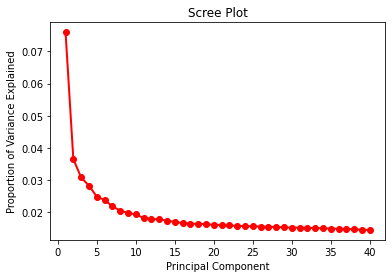

In [20]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

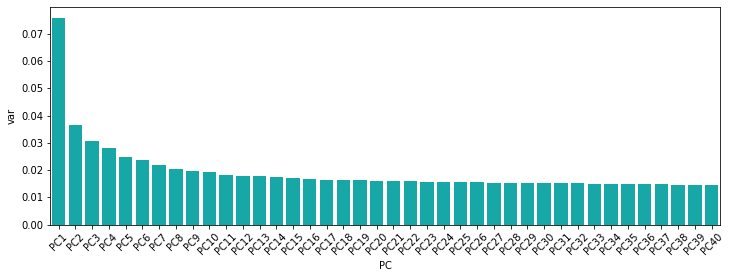

In [21]:
df_ = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':mis_pc})

fig, ax = plt.subplots(figsize=(12, 4))

sns.barplot(x='PC',y="var", 
           data=df_, color="c")
plt.xticks(rotation=45)
plt.show()

In [22]:
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Cumulative Prop. Variance Explained:  [0.07594782 0.1124333  0.14324768 0.17148431 0.19635347 0.22015245
 0.24200895 0.26250422 0.28229134 0.30163847 0.31982303 0.33776213
 0.35550927 0.3729332  0.38986718 0.40652116 0.42298537 0.43936767
 0.45571665 0.47178513 0.48780835 0.50369314 0.51946189 0.53514271
 0.5507623  0.56630506 0.5817475  0.59718356 0.61245598 0.62769741
 0.64288401 0.65801998 0.67308846 0.68809147 0.70303123 0.71789197
 0.73271925 0.7473753  0.76193358 0.7764352 ]


In [23]:
df_grafico = pd.concat([df_PCA, X_train, y_train], axis = 1)
df_grafico.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,city_development_index,training_hours,gender_Female,gender_Male,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Other,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Graduate,education_level_High School,education_level_Masters,education_level_Other,education_level_Phd,education_level_Primary School,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,experience_1,experience_10,experience_11,experience_12,experience_13,experience_14,experience_15,experience_16,experience_17,experience_18,experience_19,experience_2,experience_20,experience_3,experience_4,experience_5,experience_6,experience_7,experience_8,experience_9,experience_<1,experience_>20,experience_Other,company_size_10/49,company_size_100-500,company_size_1000-4999,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_size_Other,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_Other,last_new_job_never,target
0,3.857049,-2.488825,-1.569808,0.901218,-0.756066,-0.088467,1.283763,-0.671357,0.696660,-1.852391,-0.026000,0.976344,0.058160,-0.779951,-1.009171,-0.180005,-2.096033,-0.059996,2.433970,0.873698,-0.021981,-0.818070,-1.723017,-0.976652,0.529928,-1.096233,1.369737,-0.272942,-0.370250,0.848816,-0.704462,0.585361,-1.329440,-0.041725,-0.071625,0.249166,-0.099217,-0.752657,0.278735,-0.332077,-0.326213,1.310139,3.865916,-1.506630,-0.566729,-1.597892,1.597892,2.033223,-0.141985,-0.260797,-1.610655,0.810295,-0.345223,-0.540976,-0.155600,-0.154592,-0.129446,-0.112296,-0.133843,-0.188046,-0.110581,-0.449613,0.568796,-0.171004,-0.23468,-0.188895,-0.162501,-0.145765,-0.181573,-0.18974,-0.160556,-0.134993,-0.122105,-0.12674,-0.248849,-0.092185,3.617476,-0.280169,-0.278462,-0.262911,-0.244083,-0.20325,-0.230942,-0.168212,-0.458334,-0.058669,-0.293268,-0.397908,-0.270609,-0.346844,-0.438299,-0.215855,-0.171926,-0.268859,1.503461,-0.178705,-0.237672,-0.166328,1.438769,-0.234149,-1.022170,-0.844053,-0.423824,-0.238197,-0.239418,-0.454995,-0.149196,2.581251,1.0
1,0.350640,-2.220011,0.640361,2.952302,1.568379,-1.803925,-0.898384,0.550312,0.879547,0.971522,-0.421089,0.629290,-1.302254,0.530686,1.300184,1.090095,1.233830,-1.900102,-2.715541,0.580376,1.475174,2.439337,-0.968726,-0.257658,0.462477,0.669071,2.058726,-0.780345,0.061312,-0.166347,-0.038153,-0.284869,0.041422,0.736192,-0.441323,0.276455,0.115801,0.472335,-1.098485,0.588990,-1.194241,-0.888159,-0.258671,-1.506630,1.764510,0.625824,-0.625824,-0.491830,-0.141985,-0.260797,0.620865,0.810295,-0.345223,-0.540976,-0.155600,-0.154592,-0.129446,-0.112296,-0.133843,-0.188046,-0.110581,-0.449613,0.568796,-0.171004,-0.23468,-0.188895,-0.162501,-0.145765,-0.181573,-0.18974,-0.160556,-0.134993,-0.122105,-0.12674,-0.248849,-0.092185,-0.276436,3.569279,-0.278462,-0.262911,-0.244083,-0.20325,-0.230942,-0.168212,-0.458334,-0.058669,-0.293268,-0.397908,-0.270609,-0.346844,-0.438299,4.632743,-0.171926,-0.268859,-0.665132,-0.178705,-0.237672,-0.166328,1.438769,-0.234149,-1.022170,-0.844053,-0.423824,-0.238197,-0.239418,-0.454995,6.702586,-0.387409,0.0
2,6.535364,0.872954,1.454395,2.320577,1.357527,-1.975739,-1.877580,0.945692,-0.721967,1.608426,4.906472,-2.474511,4.307687,0.127204,-0.868076,-3.463510,-0.863721,-0.766087,0.793525,-2.110621,-0.405751,0.026814,1.019838,0.506054,0.787049,-0.669490,0.606983,-0.974271,-0.119006,0.646849,0.682471,-1.582415,-0.805036,-0.598965,0.081720,-0

### PC1 vs PC2

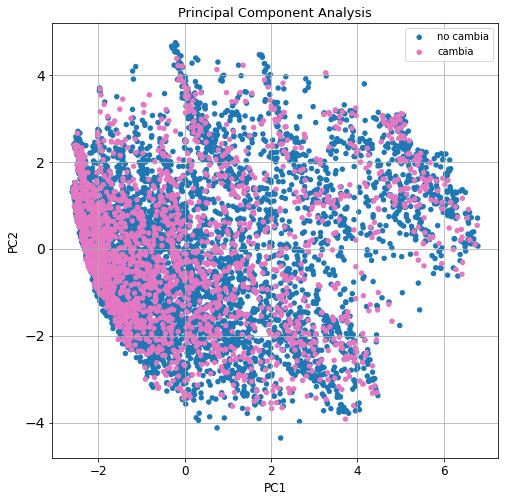

In [24]:
fig, ax = plt.subplots(figsize = (8, 8))

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1',fontsize=12)
plt.ylabel('PC2',fontsize=12)
plt.title("Principal Component Analysis",fontsize=13)

for color, target, label in zip(['tab:blue', 'tab:pink'], (0,1), ['no cambia', 'cambia']):
 
    ax.scatter(df_grafico[df_grafico['target'] == target].PC1, 
               df_grafico[df_grafico['target'] == target].PC2,
               c=color, 
               s =30, 
               label=label,
              # alpha=0.3, 
               edgecolors='none')

ax.legend()
ax.grid(True)

Podemos ver que la componente 1 tiene una concentración de valores cerca del -2 mientras que la componente 2 tiene muchos valores entre -2 y 2. 

### PC1 vs PC3

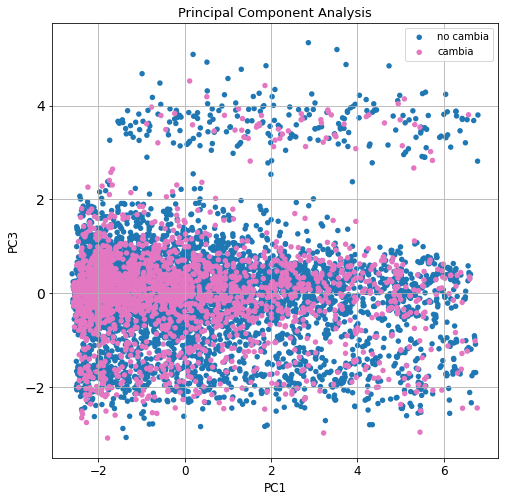

In [25]:
fig, ax = plt.subplots(figsize = (8, 8))

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1',fontsize=12)
plt.ylabel('PC3',fontsize=12)
plt.title("Principal Component Analysis",fontsize=13)

for color, target, label in zip(['tab:blue', 'tab:pink'], (0,1), ['no cambia', 'cambia']):
 
    ax.scatter(df_grafico[df_grafico['target'] == target].PC1, 
               df_grafico[df_grafico['target'] == target].PC32,
               c=color, 
               s =30, 
               label=label,
              # alpha=0.3, 
               edgecolors='none')

ax.legend()
ax.grid(True)

Aqui podemos ver que la componente 3 tiene muchos valores cercanos al cero mientras que la componente 1 tiene muchos valores en -2 yendo hacia menor cantidad de valores a medida que la componente aumenta.

## 3)  

Evaluar los siguientes clasificadores Perceptron, Perceptron máxima separación, LDA y regresión logística con penalizacion L1 y L2. Considerar
los siguientes valores de penalización, en el caso de L1: L1 = np.arange(0.025, 1., step=0.025) y en el caso de L2:L2 = 10 ** np.linspace(0., 4., num=20). Mostrar los resultados en gráficos. En base a dichos resultados que clasificador seleccionaría. (2.0 pts)

## Clasificadores

In [26]:
X_train.head()

,city_development_index,training_hours,gender_Female,gender_Male,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Other,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Graduate,education_level_High School,education_level_Masters,education_level_Other,education_level_Phd,education_level_Primary School,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,experience_1,experience_10,experience_11,experience_12,experience_13,experience_14,experience_15,experience_16,experience_17,experience_18,experience_19,experience_2,experience_20,experience_3,experience_4,experience_5,experience_6,experience_7,experience_8,experience_9,experience_<1,experience_>20,experience_Other,company_size_10/49,company_size_100-500,company_size_1000-4999,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_size_Other,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_Other,last_new_job_never
0,-0.326213,1.310139,3.865916,-1.506630,-0.566729,-1.597892,1.597892,2.033223,-0.141985,-0.260797,-1.610655,0.810295,-0.345223,-0.540976,-0.155600,-0.154592,-0.129446,-0.112296,-0.133843,-0.188046,-0.110581,-0.449613,0.568796,-0.171004,-0.23468,-0.188895,-0.162501,-0.145765,-0.181573,-0.18974,-0.160556,-0.134993,-0.122105,-0.12674,-0.248849,-0.092185,3.617476,-0.280169,-0.278462,-0.262911,-0.244083,-0.20325,-0.230942,-0.168212,-0.458334,-0.058669,-0.293268,-0.397908,-0.270609,-0.346844,-0.438299,-0.215855,-0.171926,-0.268859,1.503461,-0.178705,-0.237672,-0.166328,1.438769,-0.234149,-1.022170,-0.844053,-0.423824,-0.238197,-0.239418,-0.454995,-0.149196,2.581251
1,-1.194241,-0.888159,-0.258671,-1.506630,1.764510,0.625824,-0.625824,-0.491830,-0.141985,-0.260797,0.620865,0.810295,-0.345223,-0.540976,-0.155600,-0.154592,-0.129446,-0.112296,-0.133843,-0.188046,-0.110581,-0.449613,0.568796,-0.171004,-0.23468,-0.188895,-0.162501,-0.145765,-0.181573,-0.18974,-0.160556,-0.134993,-0.122105,-0.12674,-0.248849,-0.092185,-0.276436,3.569279,-0.278462,-0.262911,-0.244083,-0.20325,-0.230942,-0.168212,-0.458334,-0.058669,-0.293268,-0.397908,-0.270609,-0.346844,-0.438299,4.632743,-0.171926,-0.268859,-0.665132,-0.178705,-0.237672,-0.166328,1.438769,-0.234149,-1.022170,-0.844053,-0.423824,-0.238197,-0.239418,-0.454995,6.702586,-0.387409
2,-1.064442,-0.255316,-0.258671,-1.506630,1.764510,-1.597892,1.597892,-0.491830,7.042995,-0.260797,-1.610655,-1.234118,-0.345223,-0.540976,6.426728,-0.154592,-0.129446,-0.112296,-0.133843,-0.188046,-0.110581,2.224137,-1.758098,-0.171004,-0.23468,-0.188895,-0.162501,-0.145765,-0.181573,-0.18974,-0.160556,-0.134993,-0.122105,-0.12674,4.018499,-0.092185,-0.276436,-0.280169,-0.278462,-0.262911,-0.244083,-0.20325,-0.230942,-0.168212,-0.458334,-0.058669,-0.293268,-0.397908,-0.270609,-0.346844,-0.438299,-0.215855,-0.171926,-0.268859,1.503461,-0.178705,-0.237672,-0.166328,1.438769,-0.234149,-1.022170,-0.844053,-0.423824,-0.238197,-0.239418,-0.454995,-0.149196,2.581251
3,0.736512,-0.788236,-0.258671,0.663733,-0.566729,0.625824,-0.625824,-0.491830,-0.141985,-0.260797,0.620865,0.810295,-0.345223,-0.540976,-0.155600,-0.154592,-0.129446,-0.112296,-0.133843,-0.188046,-0.110581,-0.449613,0.568796,-0.171004,-0.23468,-0.188895,-0.162501,-0.145765,5.507429,-0.18974,-0.160556,-0.134993,-0.122105,-0.12674,-0.248849,-0.092185,-0.276436,-0.280169,-0.278462,-0.262911,-0.244083,-0.20325,-0.230942,-0.168212,-0.458334,-0.058669,-0.293268,-0.397908,-0.270609,2.883141,-0.438299,-0.215855,-0.171926,-0.268859,-0.665132,-0.178705,-0.237672,-0.166328,-0.695039,-0.234149,0.978311,-0.844053,-0.423824,-0.238197,-0.2

In [27]:
list(y_train)[:10]

[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

#### Definimos el cv

In [28]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

_______________________
## Perceptrón

In [29]:
perceptron = Perceptron(eta0 = 1.0, max_iter = 100)

##### Metricas de CV train

In [30]:
scores_acc = cross_val_score(perceptron, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
scores_auc = cross_val_score(perceptron, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean Accuracy train: %.3f (%.3f)' % (statistics.mean(scores_acc), statistics.stdev(scores_acc)))
print('Mean AUC train: %.3f (%.3f)' % (statistics.mean(scores_auc), statistics.stdev(scores_auc)))

Mean Accuracy train: 0.697 (0.021)
Mean AUC train: 0.646 (0.040)


##### Metricas de CV test

In [31]:
scores_acc = cross_val_score(perceptron, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
scores_auc = cross_val_score(perceptron, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean Accuracy test: %.3f (%.3f)' % (statistics.mean(scores_acc), statistics.stdev(scores_acc)))
print('Mean AUC test: %.3f (%.3f)' % (statistics.mean(scores_auc), statistics.stdev(scores_auc)))

Mean Accuracy test: 0.695 (0.029)
Mean AUC test: 0.658 (0.038)


_______________
## Perceptrón máxima separación

In [32]:
sgd_modelo = SGDClassifier(loss = 'perceptron')

##### Metricas de CV train

In [33]:
scores_acc = cross_val_score(sgd_modelo, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
scores_auc = cross_val_score(sgd_modelo, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean Accuracy train: %.3f (%.3f)' % (statistics.mean(scores_acc), statistics.stdev(scores_acc)))
print('Mean AUC train: %.3f (%.3f)' % (statistics.mean(scores_auc), statistics.stdev(scores_auc)))

Mean Accuracy train: 0.693 (0.027)
Mean AUC train: 0.639 (0.048)


##### Metricas de CV test

In [34]:
scores_acc = cross_val_score(sgd_modelo, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
scores_auc = cross_val_score(sgd_modelo, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean Accuracy test: %.3f (%.3f)' % (statistics.mean(scores_acc), statistics.stdev(scores_acc)))
print('Mean AUC test: %.3f (%.3f)' % (statistics.mean(scores_auc), statistics.stdev(scores_auc)))

Mean Accuracy test: 0.703 (0.021)
Mean AUC test: 0.655 (0.050)


_______________
## LDA

In [35]:
L1 = np.arange( 0.025 , 1 , step= 0.025 ) 

In [36]:
L2 = 10**np.linspace(0., 4., num=20)

In [37]:
lda_modelo = LinearDiscriminantAnalysis(solver='lsqr')

In [38]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid = dict()
grid['shrinkage'] = L1

# define search
tunner_lda = GridSearchCV(lda_modelo, grid, scoring='accuracy', cv=cv, n_jobs=-1)


In [39]:
# perform the search
results_train = tunner_lda.fit(X_train, y_train)
results_test =  tunner_lda.fit(X_test, y_test)

##### Metricas de CV train

In [40]:
# summarize
print('Mean AUC: %.3f' % results_train.best_score_)
print('Config: %s' % results_train.best_params_)

Mean AUC: 0.773
Config: {'shrinkage': 0.07500000000000001}


##### Metricas de CV test

In [41]:
# summarize
print('Mean auc: %.3f' % results_test.best_score_)
print('Config: %s' % results_test.best_params_)

Mean auc: 0.773
Config: {'shrinkage': 0.07500000000000001}


_________________
## Lasso

### Entrenamos 

In [42]:
logit = LogisticRegression(penalty='l1', max_iter=1000, solver='liblinear')
tunner_logit_l = GridSearchCV(estimator=logit, param_grid={'C':L1}, cv=cv)
_=tunner_logit_l.fit(X_train, y_train)

In [43]:
c_ganador = tunner_logit_l.best_estimator_.C

In [44]:
model_logit_l = np.argmax(tunner_logit_l.cv_results_['mean_test_score'])
logit_l = LogisticRegression(penalty='l1', 
                             max_iter=1000, 
                             C= c_ganador,
                             solver='liblinear')
logit_l.fit(X_train, y_train)

print('Train acc score: ' + str(logit_l.score(X_train, y_train)))
print('Test acc score: ' + str(logit_l.score(X_test, y_test)))

Train acc score: 0.7730052199850858
Test acc score: 0.7738343771746694


_____________________________
## Ridge

In [45]:
logit_r = LogisticRegression(penalty='l2', max_iter=1000)
tunner_logit_r = GridSearchCV(estimator=logit_r, param_grid={'C':L2}, cv=cv)
_=tunner_logit_r.fit(X_train, y_train)

In [46]:
c_ganador_r = tunner_logit_r.best_estimator_.C

In [47]:
model_logit_r = np.argmax(tunner_logit_r.cv_results_['mean_test_score'])
logit_r = LogisticRegression(penalty='l2',
                             max_iter=1000, 
                             C=c_ganador_r)
logit_r.fit(X_train, y_train)
y_te = logit_r.predict(X_test)
print('Train acc score: ' + str(logit_r.score(X_train, y_train)))
print('Test acc score: ' + str(logit_r.score(X_test, y_test)))

Train acc score: 0.7733780760626399
Test acc score: 0.7729645093945721


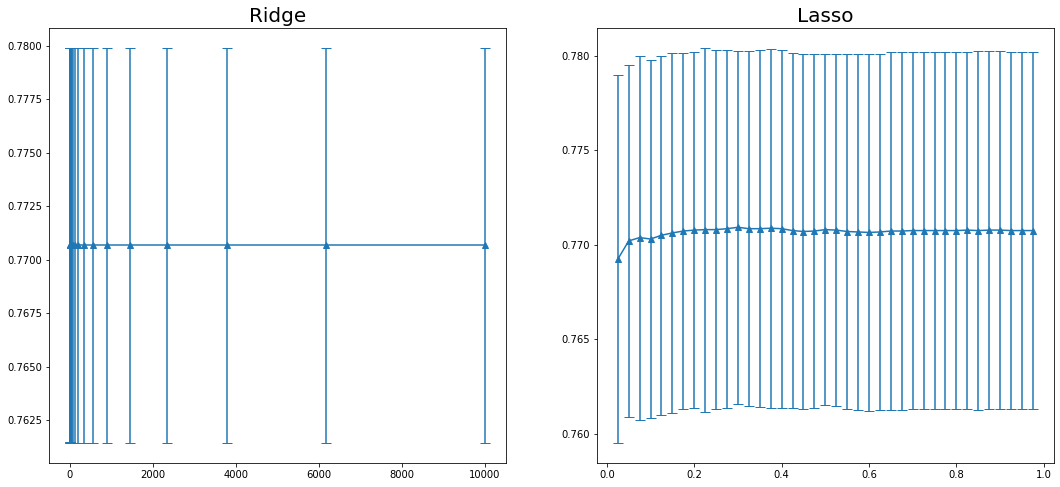

In [48]:
fig = plt.figure(figsize=(18,8))

ax = fig.add_subplot(121)
x = np.array(tunner_logit_r.cv_results_['param_C']).astype(np.float64)
ax.errorbar(x, tunner_logit_r.cv_results_['mean_test_score'], 
            yerr=tunner_logit_r.cv_results_['std_test_score'], 
            capsize=5,
            marker='^')
_=ax.set_title('Ridge', fontsize=20)

ax = fig.add_subplot(122)
x = np.array(tunner_logit_l.cv_results_['param_C']).astype(np.float64)
ax.errorbar(x, tunner_logit_l.cv_results_['mean_test_score'], 
            yerr=tunner_logit_l.cv_results_['std_test_score'], 
            capsize=5,
            marker='^')
_=ax.set_title('Lasso', fontsize=20)

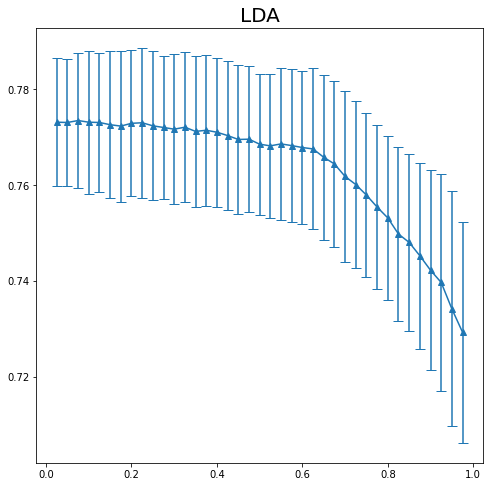

In [49]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
x = L1 
ax.errorbar(x, tunner_lda.cv_results_['mean_test_score'], 
            yerr=tunner_lda.cv_results_['std_test_score'], 
            capsize=5,
            marker='^')
_=ax.set_title('LDA', fontsize=20)


En base a lo analizado seleccionariamos el Lasso. Tanto el Ridge como el Lasso han presentado resultados aceptables.

## 4)
Con la función barh de matplotlib o pandas puede mostrar los valores de los coeficientes β de LDA y regresión logística. Previamente entrene un clasificador LDA con penalización L1 utilizando el mejor valor de shrinkage. Realice la misma tarea para regresión logística con penalización L2. Repita el gráfico para |β| > 0.1 . El uso de la función barh es una sugerencia, puede usar otro tipo de gráfico para mostrar la interacción. (1.0 pts)

In [50]:
df_lda = pd.DataFrame()
df_lda['Variable'] = X.columns.values
df_lda['Coef'] = tunner_lda.best_estimator_.coef_.flatten()
df_lda = df_lda.sort_values(by=['Coef'])

df_logit = pd.DataFrame()
df_logit['Variable'] = X.columns.values
df_logit['Coef'] = tunner_logit_r.best_estimator_.coef_.flatten()
df_logit = df_logit.sort_values(by=['Coef'])

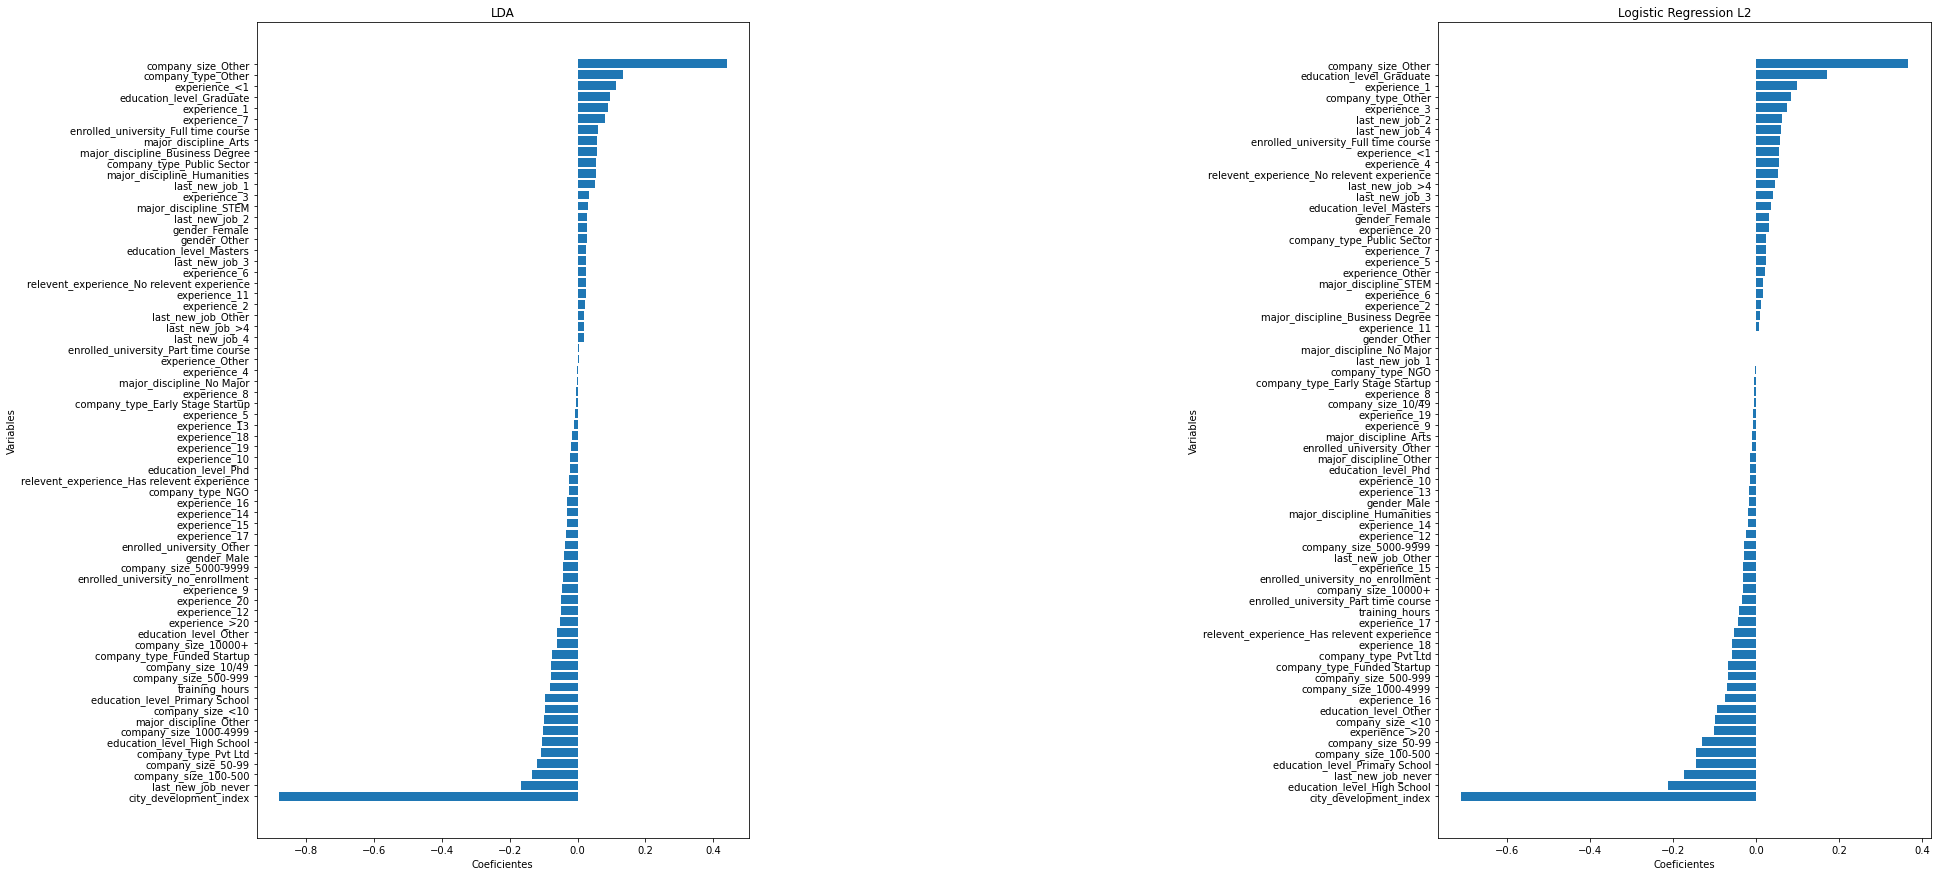

In [53]:
fig = plt.figure(figsize=(30, 15))

ax = fig.add_subplot(131)
ax.barh(df_lda.Variable, df_lda.Coef)
ax.set_title('LDA')
ax.set_xlabel('Coeficientes')
ax.set_ylabel('Variables')

ax = fig.add_subplot(133)
ax.barh(df_logit.Variable, df_logit.Coef)
ax.set_title('Logistic Regression L2')
ax.set_xlabel('Coeficientes')
ax.set_ylabel('Variables')

plt.show()

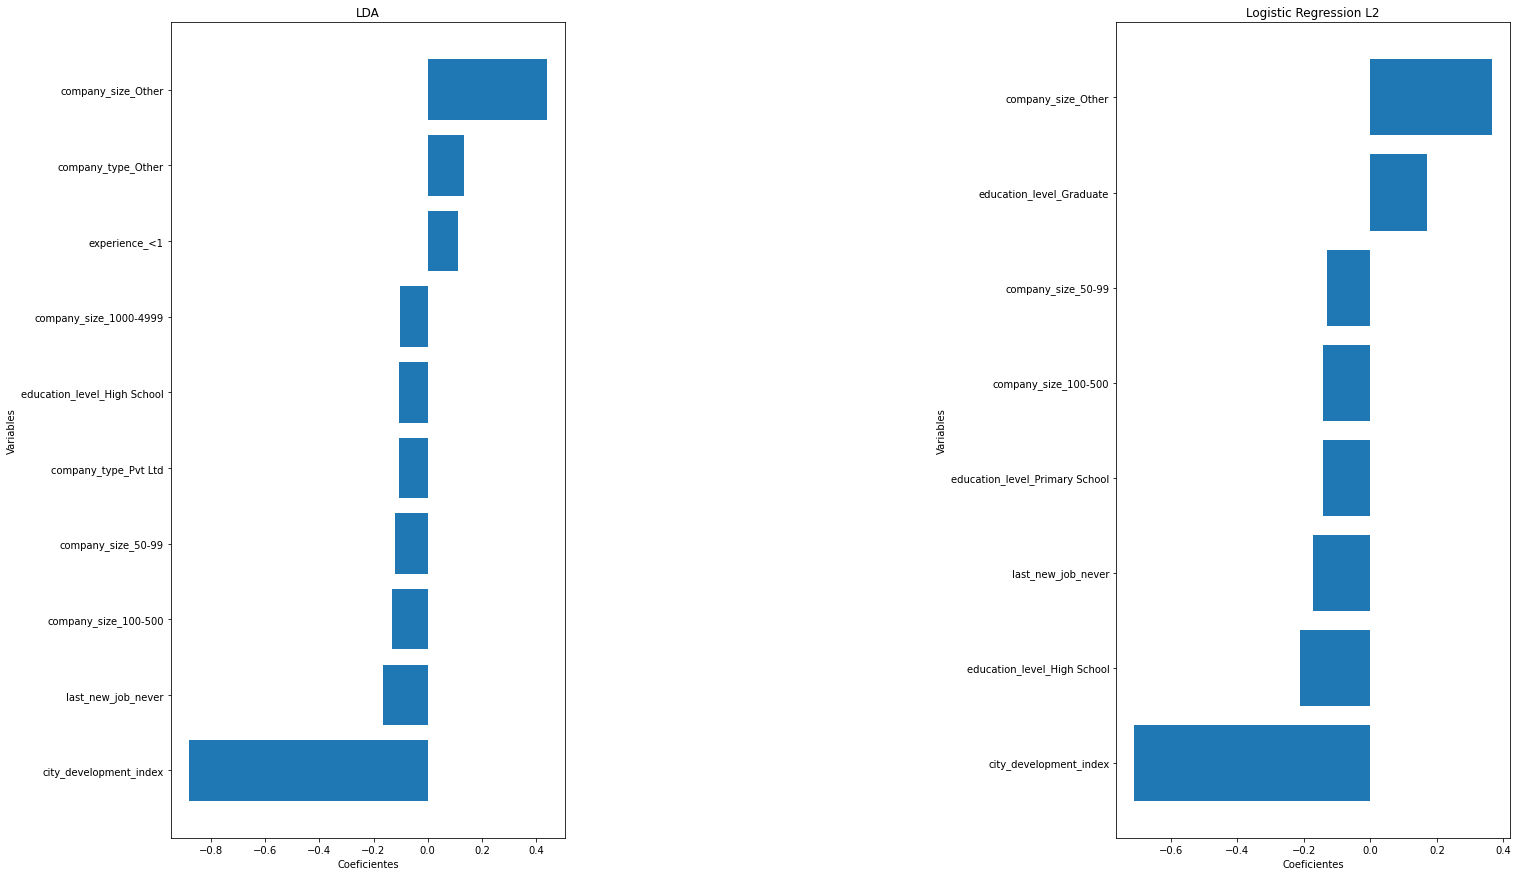

In [52]:
df_lda_filtrado = df_lda[df_lda.Coef.abs() > 0.1]
df_logit_filtrado = df_logit[df_logit.Coef.abs() > 0.1]

fig = plt.figure(figsize=(24, 15))

ax = fig.add_subplot(131)
ax.barh(df_lda_filtrado.Variable, df_lda_filtrado.Coef)
ax.set_title('LDA')
ax.set_xlabel('Coeficientes')
ax.set_ylabel('Variables')

ax = fig.add_subplot(133)
ax.barh(df_logit_filtrado.Variable, df_logit_filtrado.Coef)
ax.set_title('Logistic Regression L2')
ax.set_xlabel('Coeficientes')
ax.set_ylabel('Variables')

plt.show()

## 5) 

Mostrar el score de clasificación sobre test de los modelos del punto anterior.
(0.2 pts)

### Ridge

Text(0.5, 1.0, 'Ridge')

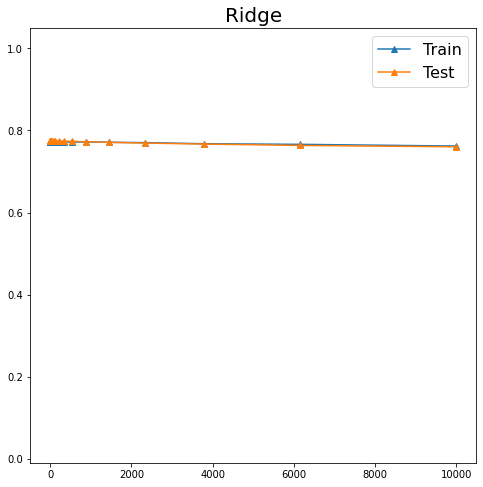

In [62]:
shrink = 10**np.linspace(0., 4., num=20)

scores_tr = np.zeros(shrink.size)
scores_te = np.zeros(shrink.size)
for ii, s in enumerate(shrink):
    lin_reg = RidgeClassifier(alpha=s)
    lin_reg.fit(X_train, y_train)
    y_te = lin_reg.predict(X_test)
    scores_tr[ii] = lin_reg.score(X_train, y_train)
    scores_te[ii] = lin_reg.score(X_test, y_test)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.plot(shrink, scores_tr, marker='^', label='Train')
ax.plot(shrink, scores_te, marker='^', label='Test')
ax.legend(loc='best', fontsize=16)
ax.set_ylim([-0.01, 1.05])
ax.set_title('Ridge', fontsize=20)


### LDA

Text(0.5, 1.0, 'LDA')

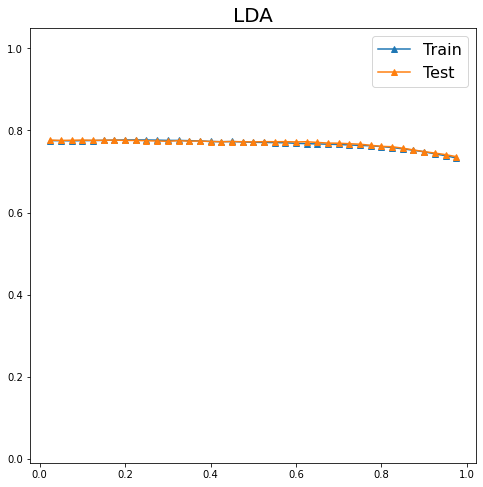

In [63]:
shrink = L1

scores_tr = np.zeros(shrink.size)
scores_te = np.zeros(shrink.size)
for ii, s in enumerate(shrink):
    lin_reg = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=s)
    lin_reg.fit(X_train, y_train)
    y_te = lin_reg.predict(X_test)
    scores_tr[ii] = lin_reg.score(X_train, y_train)
    scores_te[ii] = lin_reg.score(X_test, y_test)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.plot(shrink, scores_tr, marker='^', label='Train')
ax.plot(shrink, scores_te, marker='^', label='Test')
ax.legend(loc='best', fontsize=16)
ax.set_ylim([-0.01, 1.05])
ax.set_title('LDA', fontsize=20)
